In [ ]:
# Import all the needed packages

import numpy as np
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


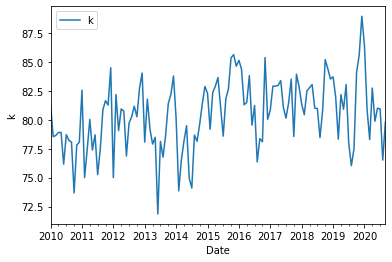

In [ ]:

# Load the data
data = pd.read_csv('k2010-20.csv', engine='python', skipfooter=3)
# A bit of pre-processing to make it nicer
data['tgl']=pd.to_datetime(data['tgl'], format='%Y-%m-%d')
data.set_index(['tgl'], inplace=True)

# Plot the data
data.plot()
plt.ylabel('k')
plt.xlabel('Date')
plt.show()



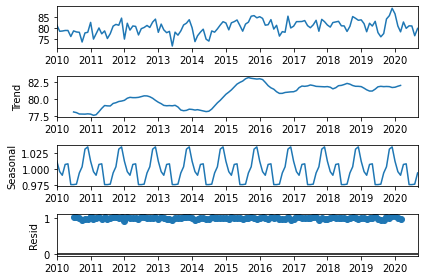

In [ ]:
result = seasonal_decompose(data, 'multipicative')
result.plot()
plt.show()

In [ ]:
# Determining if the time series is stationary or not
# Running dickey-fuller test on the time series 

result =adfuller(data['k'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -6.737716167359896
p-value: 3.1762043378237777e-09


In [ ]:
# From the above test we conclude the time series is non stationary. 
# Taking the first difference of time series and droping NaN values

data_diff = data.diff().dropna()
result_diff = adfuller(data_diff['k'])
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])

ADF Statistic: -4.592790888517891
p-value: 0.00013317991575385592


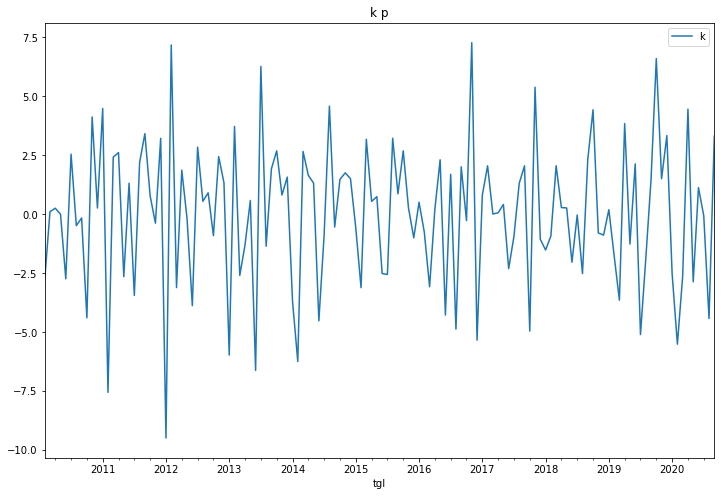

In [ ]:
# Plotting the time series after the first difference

data_diff.plot(figsize = (12,8), title = 'k p')
plt.show()

In [ ]:
# Splitting the data into train and test set
x=data.values
data_train = x[:105]
data_test = x[105:]
len(data_test)

24

In [ ]:
# Finding AIC and BIC 
# Searching the model order with lowest AIC and BIC

import warnings
warnings.filterwarnings('ignore')
for p in range(5):
    
    for q in range(5):
        
        try:
            model = ARIMA(data_train, order = (p,1,q))
            fit_model = model.fit()
            
            print(p,q,fit_model.aic, fit_model.bic)
       
        except:
            print(p,q,None,None)

0 0 529.0833472536859 534.3721290519687
0 1 498.3176490459216 506.25082174334574
0 2 498.4548139866538 509.0323775832193
0 3 492.9911061695126 506.2130606652195
0 4 494.9901334022951 510.8564787971433
1 0 507.4186193190811 515.3517920165052
1 1 494.0497099916523 504.6272735882178
1 2 502.08245005935487 515.3044045550618
1 3 None None
1 4 None None
2 0 506.7508300134163 517.3283936099818
2 1 492.9019237279355 506.1238782236424
2 2 494.7726610925683 510.6390064874165
2 3 497.14936960693285 515.6601059009224
2 4 498.9115850244587 520.0667122175897
3 0 505.24673464715556 518.4686891428624
3 1 494.7736813188695 510.6400267137177
3 2 496.7659722069248 515.2767085009144
3 3 497.9683608494066 519.1234880425376
3 4 None None
4 0 503.9001739342351 519.7665193290834
4 1 496.7372321445286 515.2479684385182
4 2 498.5838765014536 519.7390036945845
4 3 498.50994565057624 522.3094637428486
4 4 500.48676999036275 526.9306789817765


In [ ]:
# Fitting the ARIMA model into the train data set.
# Forecasting the next 60 months production 
model = ARIMA(data_train, order = (4,1,2))
fit_model = model.fit()
forecasted_data = fit_model.forecast(steps = 60)[0]
forecasted_data

array([81.05730436, 81.87656297, 81.87543437, 82.26956409, 82.13978433,
       82.43156363, 82.2625005 , 82.52896138, 82.34879871, 82.60881822,
       82.42561866, 82.68397005, 82.499953  , 82.75786761, 82.57363275,
       82.83143191, 82.6471397 , 82.90490781, 82.72060098, 82.97836029,
       82.79405019, 83.05180656, 82.8674962 , 83.12525119, 82.94094136,
       83.19869539, 83.0143863 , 83.27213947, 83.08783118, 83.34558352,
       83.16127604, 83.41902756, 83.2347209 , 83.4924716 , 83.30816576,
       83.56591564, 83.38161061, 83.63935967, 83.45505547, 83.71280371,
       83.52850033, 83.78624775, 83.60194519, 83.85969179, 83.67539005,
       83.93313583, 83.7488349 , 84.00657987, 83.82227976, 84.0800239 ,
       83.89572462, 84.15346794, 83.96916948, 84.22691198, 84.04261433,
       84.30035602, 84.11605919, 84.37380006, 84.18950405, 84.44724409])

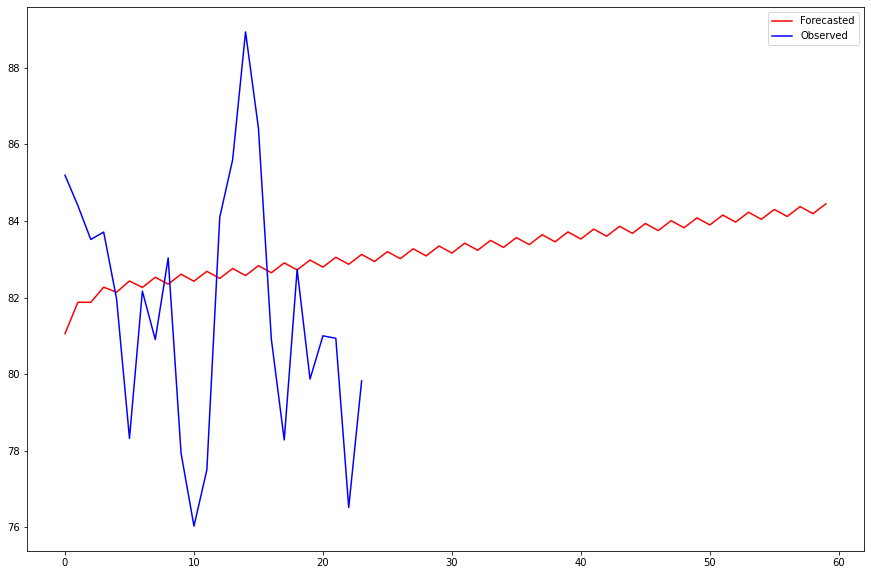

In [ ]:
# Plotting the forecasted data with the actaul test data

plt.figure(figsize=(15,10))
plt.plot(forecasted_data, color='red', label = 'Forecasted')
plt.plot(data_test, color= 'blue', label = 'Observed')
plt.legend()
plt.show()


#SARIMA


In [ ]:
!pip install pmdarima

In [ ]:
import pmdarima as pm

In [ ]:
# Run the function with the specified arguments to find the best model

sarima_model = pm.auto_arima(data, seasonal = True, m=12,d=1,D=1,start_p=1,start_q=1,start_P=0,max_p=3,max_q=3,
                             trace=True,error_action='ignore',
                            suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=564.276, Time=0.53 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=645.001, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=598.341, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=562.483, Time=0.29 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=596.219, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.95 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=1.67 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=584.212, Time=0.14 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=3.42 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=564.343, Time=0.33 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=578.047, Time=0.19 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=566.342, Time=0.93 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=564.438, Time=0.80 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]          
T

In [ ]:
# Fitting the model

sarima_model.fit(data_train)


ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 1, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
# Making the prediction based on the fitted SARIMA model

future_forecast = sarima_model.predict(n_periods=87)

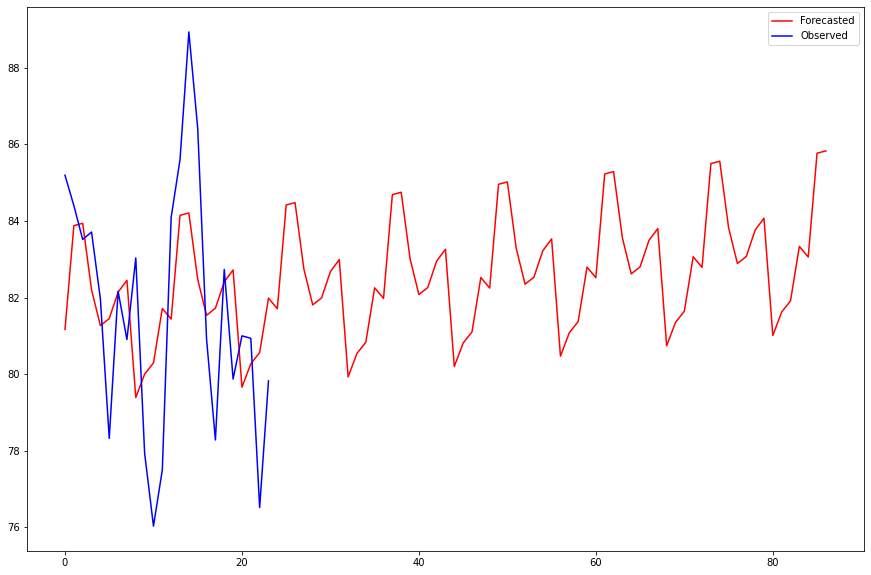

In [ ]:
# Plotting the predicted data

plt.figure(figsize=(15,10))
plt.plot(future_forecast, color='red', label = 'Forecasted')
plt.plot(data_test,color='blue', label = 'Observed')
#plt.plot(data_train,color='green', label = 'train')
plt.legend()
plt.show()

#print(data_train)
#print(data_test)
#print(future_forecast)

In [ ]:
date = pd.date_range(start="2018-10-1",end="2025-12-31", freq='M')

In [ ]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  105
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -218.676
Date:                            Sat, 12 Jun 2021   AIC                            443.352
Time:                                    17:56:50   BIC                            450.918
Sample:                                         0   HQIC                           446.406
                                            - 105                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7141      0.073     -9.723      0.000      -0.858      -0.570
ma.S.L12      -0.9994     72.532     -0.014      0.989    -143.160     141.162
sigma2         5.0880    368.944      0.014      0.989    -718.029     728.205
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                15.07
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                            -0.76
Prob(H) (two-sided):                  0.25   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame(future_forecast, columns=["ch"], index=date)

,ch
2018-10-31,81.166822
2018-11-30,83.875997
2018-12-31,83.937916
2019-01-31,82.203447
2019-02-28,81.266723
2019-03-31,81.450763
2019-04-30,82.139044
2019-05-31,82.449897
2019-06-30,79.388148
2019-07-31,80.000137


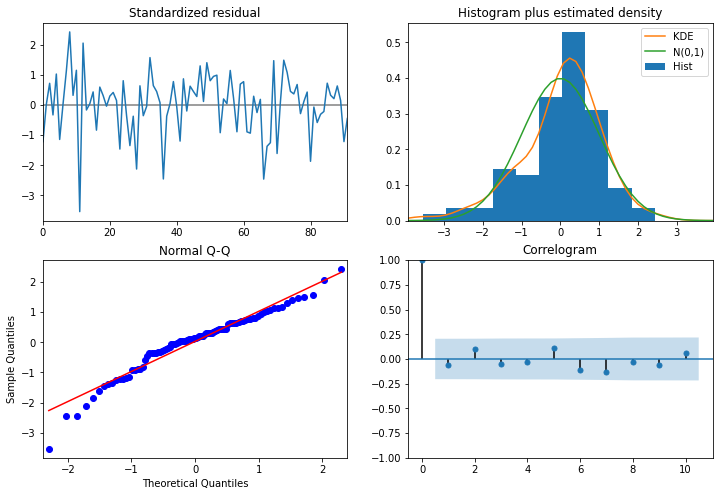

In [ ]:
# plotting the model diagnostics

sarima_model.plot_diagnostics(figsize=(12,8))
plt.show()

In [ ]:
def MAPE(y_true, y_pred): 
    """
    %Error compares true value with predicted value. Lower the better. Use this along with rmse(). If the series has 
    outliers, compare/select model using MAPE instead of rmse()
    
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(data_test,future_forecast[:24], squared=False)
mape = MAPE(data_test,future_forecast[:24])
print("rms :",rms)
print("MAPE :",mape)

rms : 2.707070961404848
MAPE : 3.4986092733041736


In [ ]:
def accuracy(y1,y2):
    
    accuracy_df=pd.DataFrame()
    
    #rms_error = np.round(rmse(y1, y2),1)
    
    #map_error = np.round(np.mean(np.abs((np.array(y1) - np.array(y2)) / np.array(y1))) * 100,1)
           
    accuracy_df=accuracy_df.append({"RMSE":rms, "%MAPE": mape}, ignore_index=True)
    
    return accuracy_df

accuracy(data_test,future_forecast[:24])

,%MAPE,RMSE
0,3.498609,2.707071
